@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/k30-YYEw05k

# <b>V de Cramer</b>
Mide la fuerza de la asociación entre dos variables nominales categóricas. <br>
Valores entre 0 (no asociación) y 1 (asociación completa).

## Módulos a utilizar

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.contingency import association

## Generación de datos y asociación sintética

In [ ]:
np.random.seed(8)

tamano = 1000
transporte = np.random.choice(["carro", "autobus", "tren", "bicicleta"],
                              size=tamano)

marca = np.empty(tamano, dtype=object)

for i in range(tamano):
  match transporte[i]:
    case "carro":
      marca[i] = np.random.choice(["apple", "google", "microsoft"],
                                  p=[0.95, 0.025, 0.025])
    case "autobus":
      marca[i] = np.random.choice(["apple", "google", "microsoft"],
                                  p=[0.05, 0.90, 0.05])
    case "tren":
      marca[i] = np.random.choice(["apple", "google", "microsoft"],
                                  p=[0.05, 0.10, 0.85])
    case "bicicleta":
      marca[i] = np.random.choice(["apple", "google", "microsoft"],
                                  p=[0.19, 0.01, 0.80])

datos = pd.DataFrame({"transporte": transporte, "marca": marca})
datos

,transporte,marca
0,bicicleta,microsoft
1,carro,apple
2,autobus,google
3,autobus,microsoft
4,autobus,google
...,...,...
995,autobus,google
996,carro,microsoft
997,carro,apple
998,bicicleta,microsoft


## Tabla de Contingencia

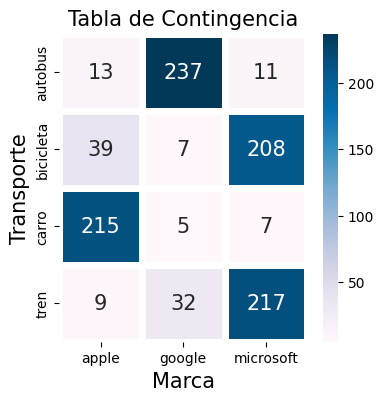

In [ ]:
# Creación de tabla de contingencia
tabla_contingencia = pd.crosstab(datos["transporte"], datos["marca"])

# Visualización de tabla de contingencia
plt.figure(figsize=(4, 4))
sns.heatmap(tabla_contingencia, annot=True, fmt="d", cmap="PuBu",
            linewidths=5, linecolor="white", annot_kws={"size": 15})
plt.title("Tabla de Contingencia", fontsize=15)
plt.xlabel("Marca", fontsize=15)
plt.ylabel("Transporte", fontsize=15)
plt.show()

# Cálculo de V de Cramer

In [ ]:
association(tabla_contingencia, method="cramer")

0.8191690084330163

## Consideraciones importantes

In [ ]:
from scipy.stats import chi2_contingency

# Prueba de independencia chi-cuadrada
chi2, valor_p, grados, frecuencias = chi2_contingency(tabla_contingencia)

print("Estadístico Chi-cuadrada:", chi2)
print("Valor p:", valor_p)
print("Grados de libertad:", grados)
print("Frecuencias esperadas:\n", frecuencias)

Estadístico Chi-cuadrada: 1342.0757287542622
Valor p: 8.427850145624616e-287
Grados de libertad: 6
Frecuencias esperadas:
 [[ 72.036  73.341 115.623]
 [ 70.104  71.374 112.522]
 [ 62.652  63.787 100.561]
 [ 71.208  72.498 114.294]]
